# __What Makes a Film Successful? - An analysis of more than 10,000 movies__

## __Table of Contents__
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## __Introduction__

What can we say about the success of a movie before it is released? Are there certain companies that have found a consistent successful formula? Given that major films costing over __$100 million__ to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

We will attempt to answer these question using a data set that contains information about __10,000 movies__ collected from __The Movie Database (TMDb)__, including user ratings and revenue.

In [1]:
# We will set up import statements for all of the packages we will be using during our analysis process

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

We will import our data and gain information about the state of the dataset to decide on the appropriate cleaning steps and the analysis approach that we will be following

### General Properties

In [2]:
# We will load our data set and view the first two rows to familiarize ourselves with its structure
movies = pd.read_csv('./tmdb-movies.csv')
movies.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# We will check for the shape of our data.

print('We can see that our data has',movies.shape[0],
      'rows, and', movies.shape[1], 'columns.')

We can see that our data has 10866 rows, and 21 columns.


In [4]:
# We will use .describe() method to gain an overview about our data and the values of each column
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


__We gained some valuable insights from the data description, such as:__

* The average runtime for each movie is around __102 Minutes__, The shortest runtime is recorded as __0__ and the longest runtime is recorded at __900 Minutes (15 Hours)__; both values require investigation and fixing.

* The data set contain movies released between __1960 abd 2015__ 

* The highest budget recorded is __425 Million Dollars__ and the minimum recorded is __0__, the case of zeros require and fixing.

* The worst rated movie (_vote_average_ column) has a rating of __1.5__ while the top rated movie has a rating of __9.2__

In [5]:
# We will view info about each column, how many null values and the type of data in each column
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# We will check for null values in each column
movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### We will be creating a heat map to identify the correltion between our Variables 

C:\Users\Ahmed Abdelfatah\AppData\Local\Temp\ipykernel_17104\3459359179.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cr = sns.heatmap(movies.corr(), annot = True, linewidths=.5, ax=ax);


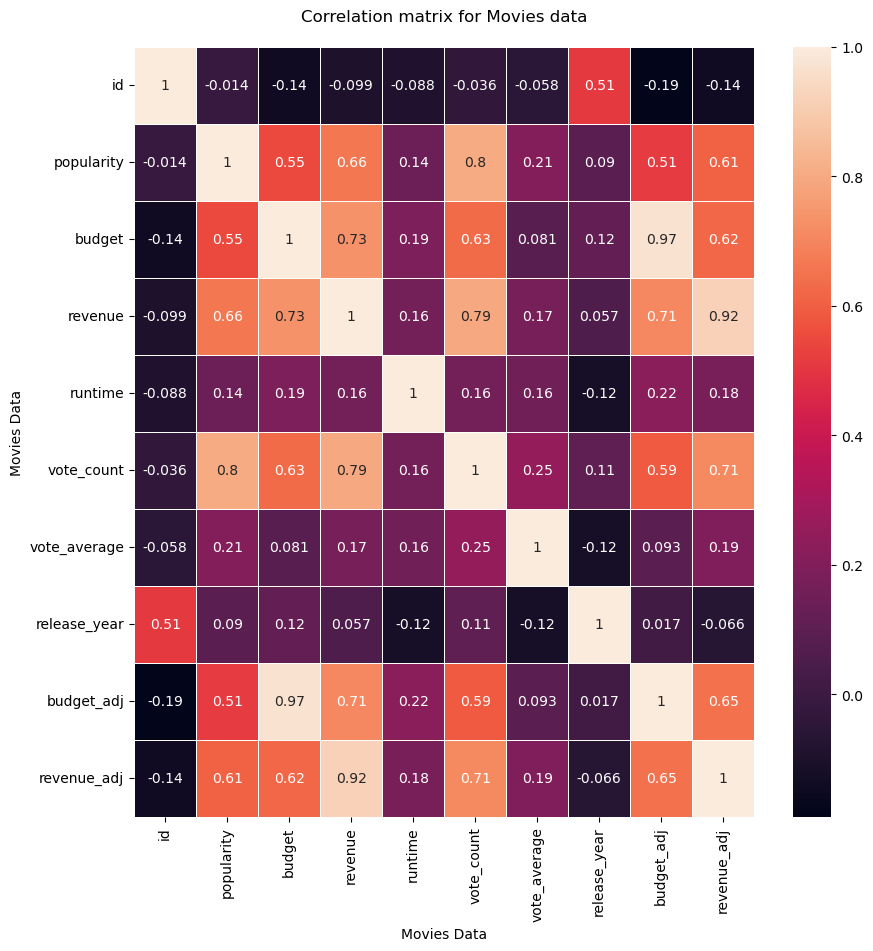

In [7]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

cr = sns.heatmap(movies.corr(), annot = True, linewidths=.5, ax=ax);
cr.set(xlabel='Movies Data', ylabel='Movies Data', title = "Correlation matrix for Movies data\n");

__From this heat map we can notice the following:__
* __Runtime__ had nearly no effect on the _revenue_ of the movie in particular or any other variable.
* There's a medium correlation between the popularity of the movie and both budget and revenue.
* There's a high correlation between the budget of a movie and its revenue.
* There's a negative correlation between release_year, average movie rating based on votes. 


### Data Cleaning

We will start by dropping empty rows and duplicated data

In [8]:
# Variable to count the number of duplicated rows
dup_count = movies.duplicated().sum()

# We delete these rows
movies.drop_duplicates(inplace=True)
print('We removed', dup_count, 'duplicated row(s).')

We removed 1 duplicated row(s).


In [9]:
# Creating a new column to Calculate the profit of each movie
movies['profit'] = movies['revenue_adj'] - movies['budget_adj']
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [10]:
# We will first create a seperate dataframe the contains the movie title, cast, genre, production companies
movies_metadata = movies[['original_title', 'cast', 'genres', 'production_companies', 'director', 'release_year', 'profit']]
movies_metadata.head()

,original_title,cast,genres,production_companies,director,release_year,profit
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,Colin Trevorrow,2015,1.254446e+09
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,George Miller,2015,2.101614e+08
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,Robert Schwentke,2015,1.704191e+08
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,J.J. Abrams,2015,1.718723e+09
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,James Wan,2015,1.210949e+09


In [11]:
# We will drop these columns from our data and then view the top rows from the data frame
movies.drop(['id',  'imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'overview', 'release_date', 'vote_count', 'cast', 'genres', 'production_companies', 'director', 'keywords'], axis=1, inplace=True)
movies.head()

,popularity,original_title,runtime,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,124,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,120,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,119,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,136,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,137,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [12]:
# We will check the sum of the null values in each column to decide whether we can fill these values or not 
movies.isnull().any().sum()

0

We have no null values in our data

In [13]:
# Deleting the row with NAN values 
movies.dropna(axis=0 , inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

### Which Year was the most succesful year in Hollywood in Terms of Revenues, Budget, Popularity and Profit?
(Based on averages per movie)

In [14]:
# We will group our movies by the year of release
movies_py = movies[['release_year', 'popularity', 'revenue_adj', 'budget_adj', 'profit']].groupby('release_year').max()
movies_py.head()


,popularity,revenue_adj,budget_adj,profit
release_year,,,,
1960,2.610362,4.423780e+08,8.847561e+07,3.539024e+08
1961,2.631987,1.574815e+09,4.376917e+07,1.545635e+09
1962,3.170651,5.045914e+08,1.081267e+08,4.216943e+08
1963,2.508235,5.617734e+08,2.215444e+08,5.439729e+08
1964,3.153791,8.780804e+08,1.195145e+08,8.534745e+08


In [15]:
# Finding the year with the most popular movies on average
most_popular = movies_py['popularity'].max()
print(movies_py[movies_py['popularity'] == most_popular])

              popularity   revenue_adj    budget_adj        profit
release_year                                                      
2015           32.985763  1.902723e+09  2.575999e+08  1.718723e+09


Seems that the year with the most popular movies on average is __2015__, with an average popularity rating of __32.98__

In [16]:
# Finding the year with the highest revenue movies on average
highest_revenue = movies_py['revenue_adj'].max()
print(movies_py[movies_py['revenue_adj'] == highest_revenue])

              popularity   revenue_adj    budget_adj        profit
release_year                                                      
2009            9.432768  2.827124e+09  2.541001e+08  2.586237e+09


Seems that the year with the highest revenue average is __2009__, with an average revenue of __2,827,124,000__ 
(Adjusted for infilation, and mostly due to Avatar the most successful movie of all time - recently been surpassed by __Avengers: Infinity War__ but data is up to __2015__ -)

In [17]:
highest_budget = movies_py[movies_py['budget_adj'] == movies_py['budget_adj'].max()]
print(highest_budget)

              popularity   revenue_adj   budget_adj       profit
release_year                                                    
2010            9.363643  1.063172e+09  425000000.0  863171911.0


Seems that the year with the highest budget average is __2010__, with an average budget of __425 Million Dollars__ (Adjusted for infilation)

In [18]:
most_profitable = movies_py[movies_py['profit'] == movies_py['profit'].max()]
print(most_profitable)

              popularity   revenue_adj    budget_adj        profit
release_year                                                      
1977           12.037933  2.789712e+09  7.915118e+07  2.750137e+09


Seems that the year with the highest profit average is __1977__, with an average profit of __2,750,137,000__ (Adjusted for infilation)

#### Now we will look at some graphs to help support our findings


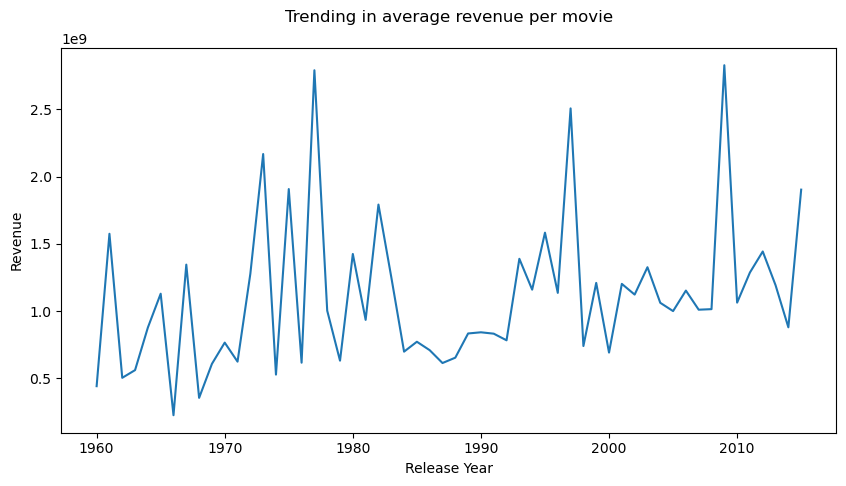

In [19]:
# First, we will look at the trend in revenue per year
movies_py['revenue_adj'].plot(xlabel='Release Year', ylabel='Revenue', title = "Trending in average revenue per movie\n", figsize=(10,5));

We notice that on average, the movies after the year 2000 has a higher revenue

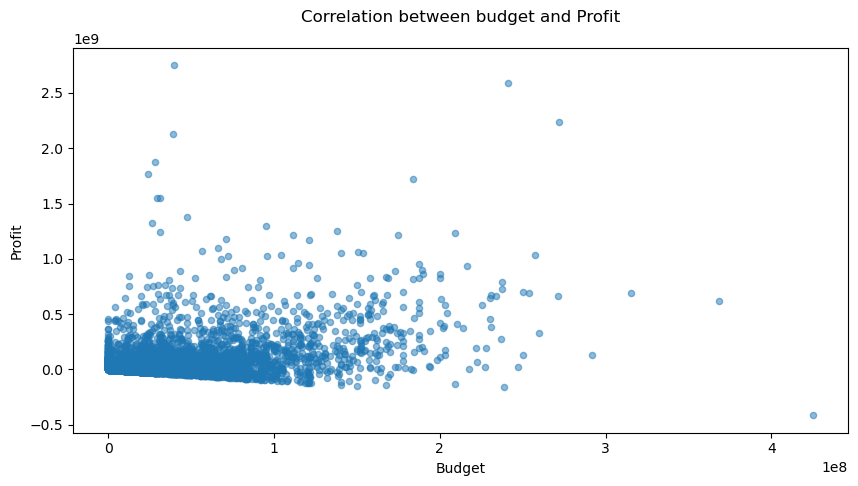

In [20]:
# Secondly we will explore the relation between profit and budget
movies.plot(kind='scatter', x = 'budget_adj', y = 'profit', alpha=0.5,
            xlabel='Budget', ylabel='Profit', title = "Correlation between budget and Profit\n", figsize=(10,5));

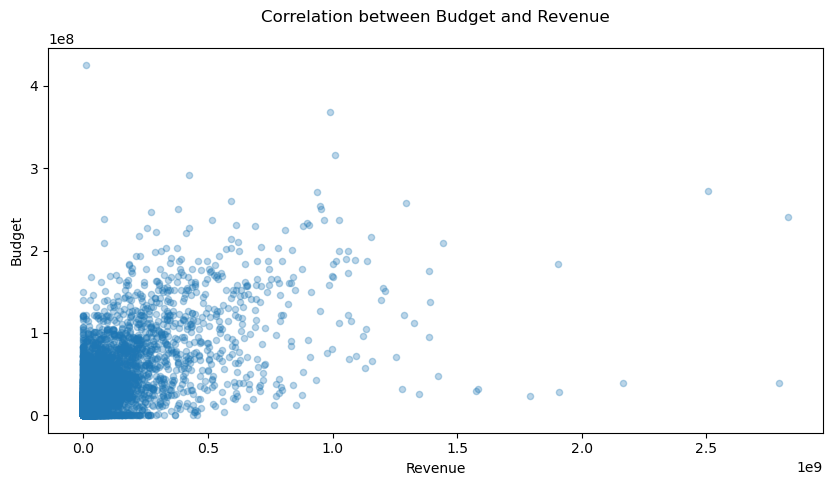

In [21]:
# Secondly we will explore the relation between revenue and budget
movies.plot(kind='scatter', x = 'revenue_adj', y = 'budget_adj', alpha=0.3,
            xlabel='Revenue', ylabel='Budget', title = "Correlation between Budget and Revenue\n", figsize=(10,5));

We notice that generally the higher budget movies turn in the highest profit

### What are the Most Profitable Genres ?
### The Actors and Directors that are capable of turning in more than a 100 million dollars in profit?

In [22]:
# To achieve this, we willl start by filtering for movies with profits that exceed 100 million
movies_hun = movies_metadata[movies_metadata['profit'] > 100000000]
movies_hun.head()

,original_title,cast,genres,production_companies,director,release_year,profit
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,Colin Trevorrow,2015,1.254446e+09
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,George Miller,2015,2.101614e+08
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,Robert Schwentke,2015,1.704191e+08
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,J.J. Abrams,2015,1.718723e+09
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,James Wan,2015,1.210949e+09


In [23]:
# Some descriptive statistics about the data set
movies[movies['profit'] > 100000000].describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj,profit
count,1089.000000,1089.000000,1089.000000,1089.000000,1.089000e+03,1.089000e+03,1.089000e+03
mean,2.077476,115.955923,6.469421,1998.367309,7.103093e+07,3.715738e+08,3.005429e+08
std,2.254298,28.492322,0.700611,13.089591,5.775737e+07,2.909409e+08,2.682571e+08
min,0.044675,44.000000,4.200000,1960.000000,0.000000e+00,1.000516e+08,1.000516e+08
25%,0.920528,99.000000,6.000000,1991.000000,2.667999e+07,1.903475e+08,1.381282e+08
50%,1.480497,113.000000,6.500000,2001.000000,5.793440e+07,2.746954e+08,2.073424e+08
75%,2.526779,127.000000,7.000000,2009.000000,1.047242e+08,4.460595e+08,3.616719e+08
max,32.985763,705.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09


We notice that in __Cast, Genres, Production Companies__ is separated by "__|__" so we will create a function that separates these enteries in order to count the necessary data

In [24]:
# We will Start by creating a function that counts the participation of each elemnt   

def column_split(column):
    
    df = movies_hun[column]
    # spliting Data by '|'
    df = df.apply(lambda x: x.split('|'))
    # Creating a separate dataframe for each value in a column 
    split_data = pd.DataFrame(df.tolist())
    # Creating a list to add all the values of the 5 columns to it 
    df_count = []
    
    # Creating a for loop to add all the items to the list 
    for i in split_data.columns:
        split_data[i].apply(lambda x: df_count.append(x))
        
    # Transforming the list to data frame to get the counts of elements    
    df_count = pd.DataFrame(df_count)
    result = df_count[0].value_counts()
    
    return result

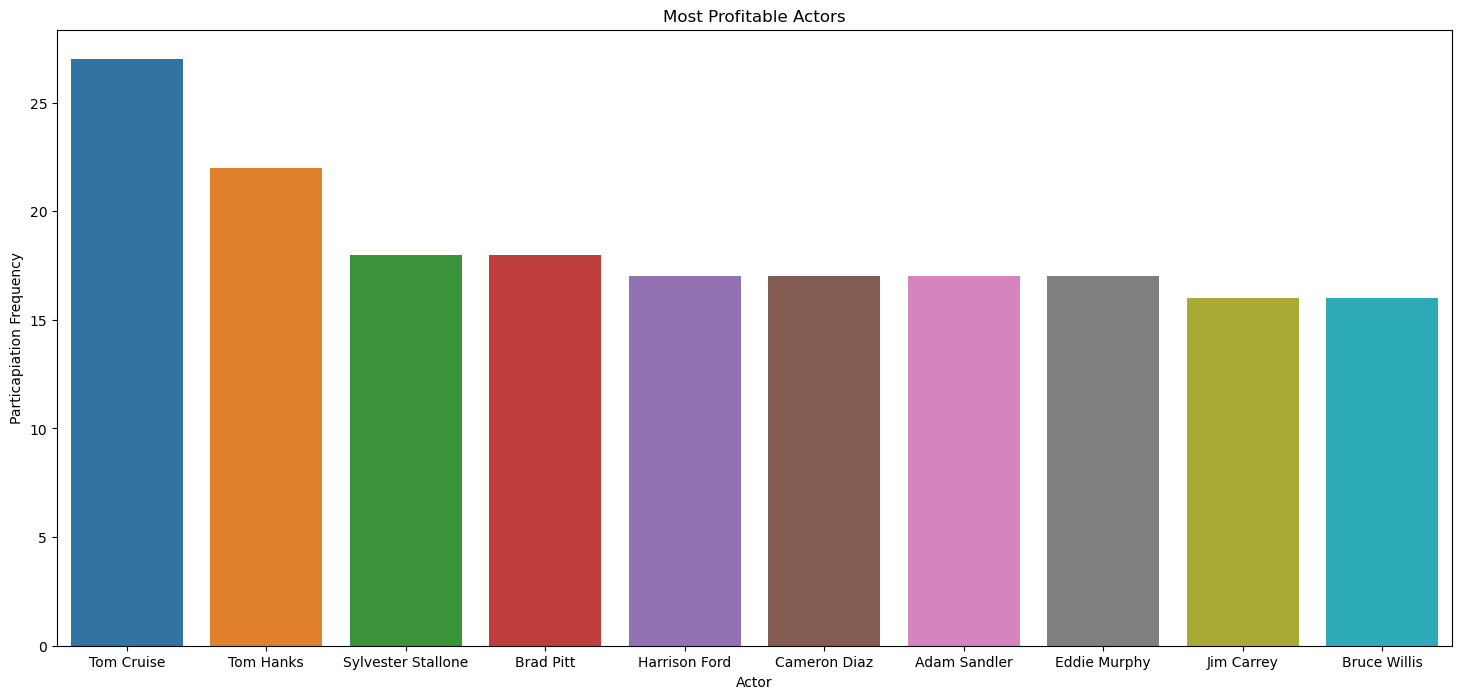

In [25]:
# First we will explore the Top 10 actors with the highest particpation in a highly profitable movies (+100 million)

def meta_summary(column, count=10):
    #getting the top 10 actors 
    actors = pd.DataFrame(column_split(column).head(count))
    #Changing Actors from index to a column 
    actors.reset_index(inplace=True)
    return actors

#Changing Actors from index to a column 
actors = meta_summary('cast')
actors.rename(columns = {'index':'Actor'}, inplace = True)

# Plotting a graph to show the number of apperances of the top 10 actors 
fig, ax = plt.subplots(figsize=(18,8))   
C = sns.barplot(x = 'Actor', y = actors[0], data = actors, ax=ax);
C.set( xlabel = "Actor", ylabel = "Particapiation Frequency", title='Most Profitable Actors');

We see __Tom Cruise and Tom Hank__ as the highest two actors associated with highly profitable movies.

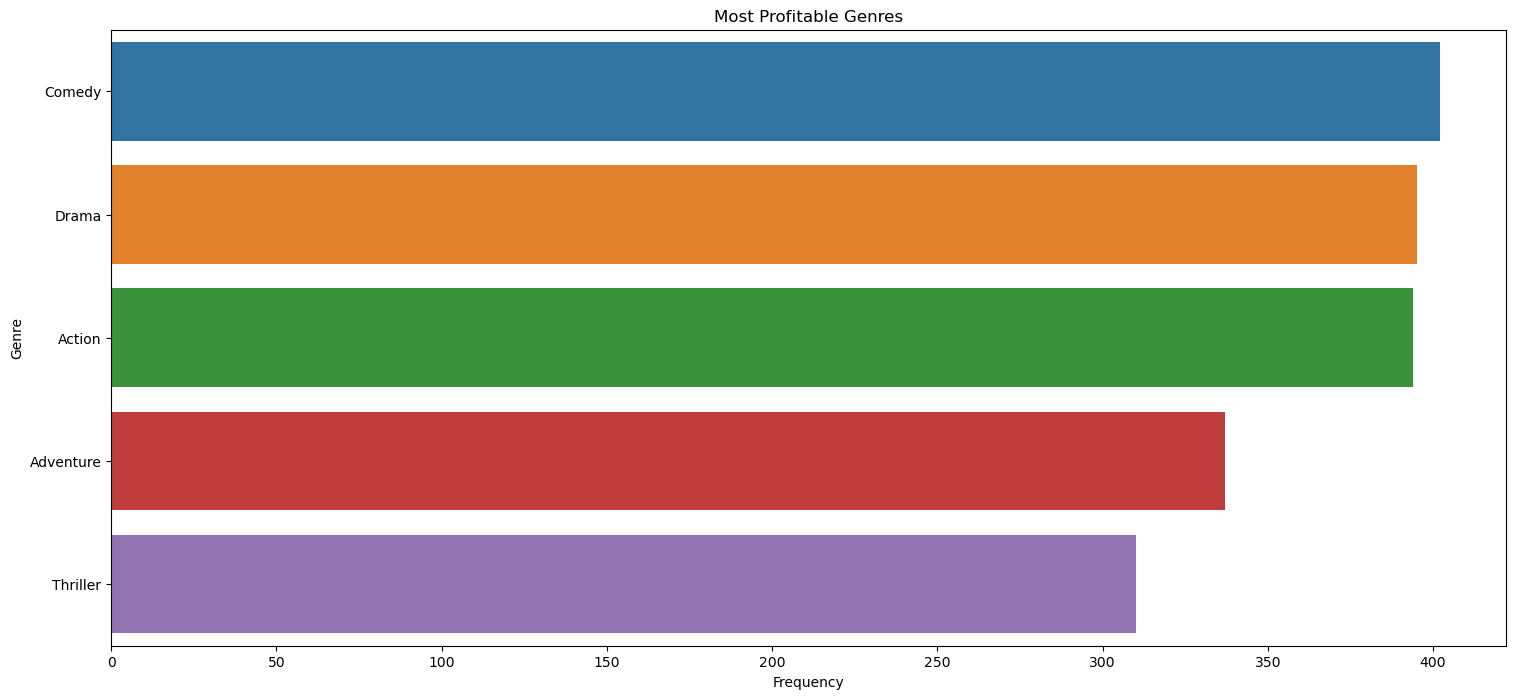

In [26]:
# Now we will explore the Top 5 genres with the highest profitablity (+100 million)
genre= meta_summary('genres', 5)
genre.rename(columns = {'index':'genres'}, inplace = True)

# now we will show the genres in graph
fig, ax = plt.subplots(figsize=(18,8)) 
G = sns.barplot(y = 'genres',x = genre[0],data = genre, ax=ax );
G.set( xlabel = "Frequency", ylabel = "Genre", title='Most Profitable Genres');

We can see that __Comedy, Drama and Action__ are the top 3 highly profitable movie genres.

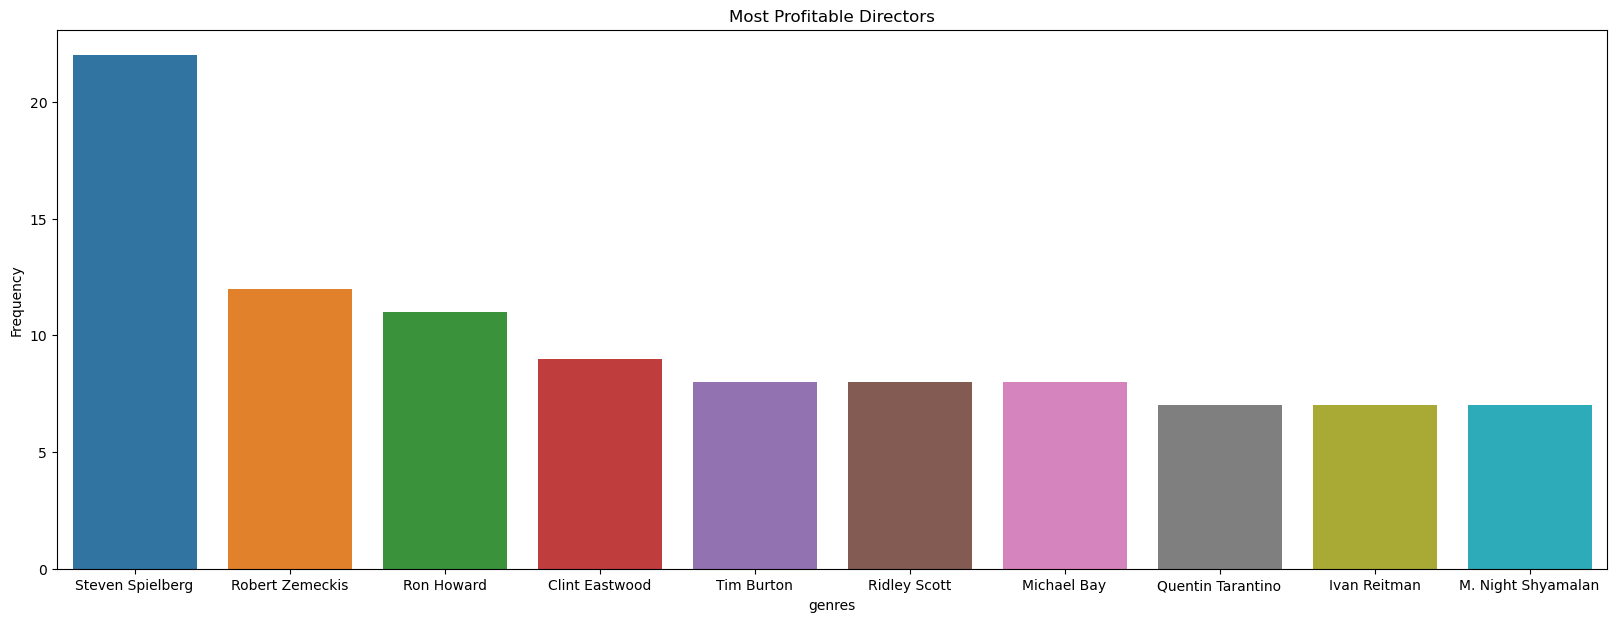

In [27]:
# Finally the directors that are most associated with profitable movies 
director = meta_summary('director', 10)
director.rename(columns = {'index':'director'}, inplace = True)

# now we will show the director in a graph 
fig, ax = plt.subplots(figsize=(20,7)) 
D = sns.barplot(x = 'director',y = director[0],data = director);
D.set( xlabel = "genres", ylabel = "Frequency", title='Most Profitable Directors');

We notice that __Steven Spielberg's__ association with highly profitable movies is almost double than the nearest director.

<a id='conclusions'></a>
## Conclusions

We have analyzed data about more than __10,000__ produced between __1960__ and __2015__, we had a focus on the insights most related to the factors that results in a highly profitable movie (such as: Directors, certain actors that may be known for their blockbuster status, and the favorite genres for the audience)

From this approach we found the following:

* The average runtime of the movies can be arround __112.56__ Minutes (Found during the initial data exploration)

* The Top 5 Profitable Genres are __Comedy, Drama, Action, Adventure, Thrillers__ in that order.

* The Top 5 Actors associated with these movies are __Tom Cruise, Tom Hanks, Sylvester Stallone, Brad Pitt, Harrison Ford__

* The Top 5 Directors associated with profitable movies are __Steven Spielberg, Robert Zemeckis, Ron Howard, Clint Eastwood, Tim Burton__

* The average budget of a highly profitable movies is __71,030,930 Million Dollars__ while the average revenue is __371,573,800 Million Dollars__ turning in an Average profit of __300,542,870 Million Dollars__

### Limitations

* The dataset is for movies from the year 1960 to 2015, in recent times big franchises and super hero genre have taken over the cinema, so more up-to-date is needed.

* This conclusion does not gurantee the making of a hit film, but ensure the highest chance of becoming one.

* There are more analysis potential in our data, but for the scope of this project we just explored some avenues.

#### Some future questions we might answer or explore:

* The correlation between the season/month and the genres most profitable during such periods (for example: Horror Movies are more popular during halloween, family movies are more popular during the holiday seasons, and so on)

* The diffrence between the average revenue of standalone triple A movies and established franchises such as MCU (Marvel Cinematic Universe).